<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

- try some 1-sample t-tests



1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)
3. You try and create some kind of a visualization that communicates the results of your hypothesis tests. This can be as simple as a histogram of the p-values or the t-statistics.

In [0]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind,ttest_1samp

## 1 -- load and clean

In [151]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",
                          names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df = df.replace({'n':0,'y':1,'?':np.nan})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
rep = df[df.party == 'republican']
dem = df[df.party == 'democrat']

## 2 -- hypothesis testing: dems support bill more than republican with p < .01

### preview: synthetic fuels

In [153]:
print('democracts')
print(dem.synfuels.value_counts())
print('\nRepublicans')
print(rep.synfuels.value_counts())

democracts
1.0    129
0.0    126
Name: synfuels, dtype: int64

Republicans
0.0    138
1.0     21
Name: synfuels, dtype: int64


### synthetic fuels

1) null hypothesis: democrats support the bill as much as republicans

2) alternative hypothesis: There is a statistically significant difference between the votes of republicans and democrats on this bill

3) confidence level 99%

In [154]:
ttest_ind(dem.synfuels,rep.synfuels,nan_policy='omit')

Ttest_indResult(statistic=8.293603989407588, pvalue=1.5759322301054064e-15)

4) t-statistic: 8.294

5) pvalue: .00000000000000158

---
conclusion:
Due to the t-statistic (8.294) having a p-value of 1.58E-15, we reject the null hypothesis that democrats and republicans support the syntetic fuels bill equally and suggest the alternative hypothesis that their thoughts on the bill differ

## 3 -- hypothesis testing: republicans support bill more than democrats with p < .01

### preview: Crime

In [155]:
print('democrats:')
print(dem.crime.value_counts())
print('\nrepublicans')
print(rep.crime.value_counts())

democrats:
0.0    167
1.0     90
Name: crime, dtype: int64

republicans
1.0    158
0.0      3
Name: crime, dtype: int64


1) null hypothesis: republicans and democrats vote similarly on this particular bill related to crime

2) alternative hypothesis: republicans and democrats vote differently regarding this bill on crime

3) confidence level - 99%

In [156]:
ttest_ind(rep.crime,dem.crime,nan_policy='omit')

Ttest_indResult(statistic=16.342085656197696, pvalue=9.952342705606092e-47)

4) t-statistic : 16.34

5) p-value : 9.95E-47

---
conclusion:

given the t-statistic (16.34) with a p-value of 9.95E-47, we reject the null hypothesis that democrats and republicans vote similarly on this bill related to crime and instead suggest the alternative hypothesis that republicans and democrats vote very differently on this crime bill

## 4 -- hypothesis testing: republicans support bill more than democrats with p > .01

### preview - water project

In [157]:
print('democrats')
print(dem['water-project'].value_counts())
print('\nrepublicans')
rep['water-project'].value_counts()

democrats
1.0    120
0.0    119
Name: water-project, dtype: int64

republicans


1.0    75
0.0    73
Name: water-project, dtype: int64

1) null hypothesis : there is no statistically significant difference between the way democrats and republicans vote on the water-project

2) alternative hypothesis : there ***is*** a statistically significant difference between the way democrats and republicans vote on the water-project

3) confidence level : 99%

In [158]:
ttest_ind(dem['water-project'],rep['water-project'],nan_policy='omit')

Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)

4) t-statistic : -.089

5) p-value : .929

---
given the t-statistic (abs value = .089) and a p-value of .929, we fail to reject the null hypothesis that there is no statistically significant difference between the way democrats and republicans feel on the water project bill

## One sample t-test

### preview democrats and republicans on education

In [159]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [160]:
print('democrats')
print(dem.budget.value_counts())
print('\nrepublicans')
print(rep.budget.value_counts())

democrats
1.0    231
0.0     29
Name: budget, dtype: int64

republicans
0.0    142
1.0     22
Name: budget, dtype: int64


1) null hypothesis: democrats will vote favoribly on the budget bill (90% in favor)

2) alternative hypothesis: democrats will not vote yes on the budget bill 90% of the time

3) confidence level 99%

In [161]:
print('democrats:')

print(ttest_1samp(dem.budget,.9,nan_policy='omit'))

democrats:
Ttest_1sampResult(statistic=-0.5898833634246224, pvalue=0.5557831066865565)


4) t-statistic : ~.590

5) p-value : ~.556

---
conclusion

Given the t-statistic(abs value ~.590) with pvalue ~.556, we failed to reject the null hypothesis that republicans will vote in favor of the budget bill 90% of the time



## Stretch -- automate these comparison tests between democrats and republicans for ALL issues

In [0]:
issues = list(df.columns)[1:] # remove 'party' from columns

In [163]:
issue_dict={}
for issue in issues:
  print(' '.join(issue.upper().split('-')))
  null_hyp = 'there is no statistically significant difference between voting policies of Democracts and Republicans on the issue of "'+' '.join(issue.lower().split('-'))+'".'
  alt_hyp = 'there is a statistically significant difference between voting policies of Democracts and Republicans on the issue of "'+' '.join(issue.lower().split('-'))+'".'
  print('Null hypothesis:',null_hyp)
  print('Alternative hypothesis:',alt_hyp)
  ttest = (ttest_ind(dem[issue],rep[issue],nan_policy='omit'))
  print('t-statistic:',ttest[0])
  print('p-value:',ttest[1])
  if abs(ttest[1]) < .01:
    print('We REJECT the null hypothesis that',null_hyp,'\n\n')
    issue_dict.update({issue:'REJECT'})
  else:
    print('We FAILED TO REJECT the null hypothesis that',null_hyp,'\nWe SUGGEST the alternative hypothsis that',alt_hyp,'\n\n')
    issue_dict.update({issue : 'Failed to Reject'})

HANDICAPPED INFANTS
Null hypothesis: there is no statistically significant difference between voting policies of Democracts and Republicans on the issue of "handicapped infants".
Alternative hypothesis: there is a statistically significant difference between voting policies of Democracts and Republicans on the issue of "handicapped infants".
t-statistic: 9.205264294809222
p-value: 1.613440327937243e-18
We REJECT the null hypothesis that there is no statistically significant difference between voting policies of Democracts and Republicans on the issue of "handicapped infants". 


WATER PROJECT
Null hypothesis: there is no statistically significant difference between voting policies of Democracts and Republicans on the issue of "water project".
Alternative hypothesis: there is a statistically significant difference between voting policies of Democracts and Republicans on the issue of "water project".
t-statistic: -0.08896538137868286
p-value: 0.9291556823993485
We FAILED TO REJECT the nu

In [164]:
issue_dict

{'aid-to-contras': 'REJECT',
 'anti-satellite-ban': 'REJECT',
 'budget': 'REJECT',
 'crime': 'REJECT',
 'duty-free': 'REJECT',
 'education': 'REJECT',
 'el-salvador-aid': 'REJECT',
 'handicapped-infants': 'REJECT',
 'immigration': 'Failed to Reject',
 'mx-missile': 'REJECT',
 'physician-fee-freeze': 'REJECT',
 'religious-groups': 'REJECT',
 'right-to-sue': 'REJECT',
 'south-africa': 'REJECT',
 'synfuels': 'REJECT',
 'water-project': 'Failed to Reject'}

## Visualization

In [0]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [225]:
party_counts = df.groupby('party').mean()*100
party_counts

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
party,,,,,,,,,,,,,,,,
democrat,60.465116,50.209205,88.846154,5.405405,21.568627,47.674419,77.220077,82.889734,75.806452,47.148289,50.588235,14.457831,28.968254,35.019455,63.745020,93.513514
republican,18.787879,50.675676,13.414634,98.787879,95.151515,89.759036,24.074074,15.286624,11.515152,55.757576,13.207547,87.096774,86.075949,98.136646,8.974359,65.753425


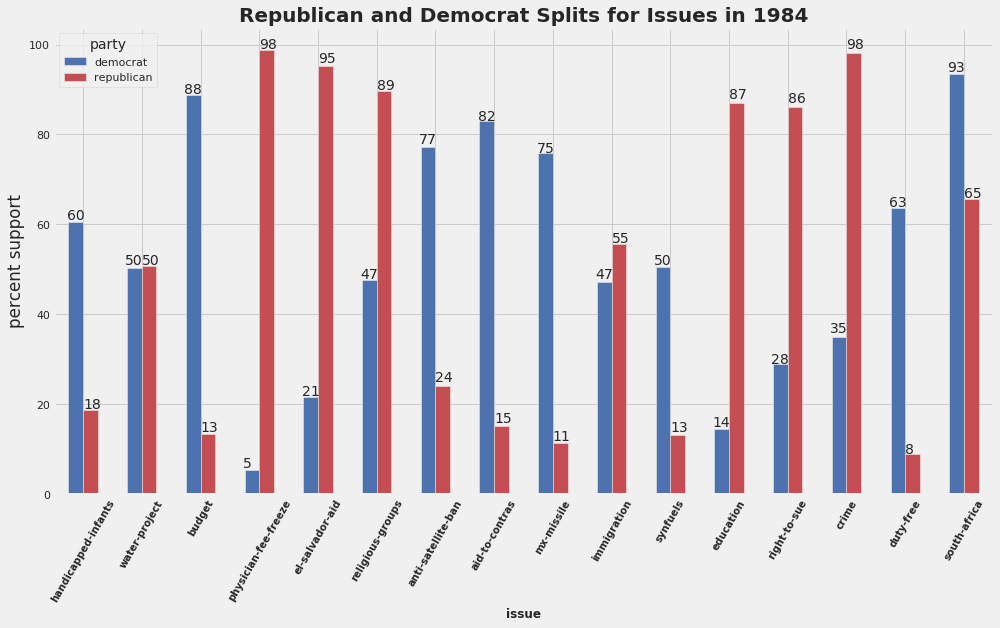

In [283]:
party_counts.T.plot(kind='bar',figsize=(15,8),color=['b','r'])
plt.title("Republican and Democrat Splits for Issues in 1984",fontsize=20,fontweight='bold')
plt.xticks(rotation=60,fontsize=10,fontweight='bold')
plt.xlabel('issue',fontsize=12,fontweight='bold')
plt.ylabel('percent support');


dem_x = [(i-.28) for i in range(16)]
rep_x = [(i) for i in range(16)]

for i,x in enumerate(dem_x):
  y = int(party_counts.iloc[0,i])
  plt.annotate(xy=(x,y+1),s=y)
  
for i,x in enumerate(rep_x):
  y = int(party_counts.iloc[1,i])
  plt.annotate(xy=(x,y+1),s=y)
  